# Notebook used for producing final processed data to go into the Report

In [9]:
from matplotlib import pyplot as plt 
import pandas as pd 
import numpy as np
from astropy.coordinates import SkyCoord
import astropy.units as u

In [ ]:
# --- Plot Parameters ---- 
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams["figure.dpi"] = 100
plt.rc('font', family = 'serif', serif = 'cmr10') 
plt.rcParams.update({# Use mathtext, not LaTeX
                            'text.usetex': False,
                            # Use the Computer modern font
                            'font.family': 'serif',
                            'font.serif': 'cmr10',
                            'mathtext.fontset': 'cm',
                            })
plt.rcParams.update({'font.size': 22})
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['axes.labelsize'] = 30
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
colour_arrays = ['red', 'blue', 'green', 'crimson', 'lime']

## Target Selection 

In [31]:
targets = pd.read_csv('supplementary_data/targetlist.csv')
targets.head()

,Name,RAJ2000,DEJ2000,Age,Group
0,Berkeley 28,06 52 12,02 56 00,7.846,1
1,Bochum 2,06 48 54,00 23 00,6.665,1
2,NGC 2355,07 16 59,13 45 00,8.850,1
3,NGC 2324,07 04 07,01 02 42,8.630,1
4,King 15,00 32 54,61 52 00,8.400,2


In [48]:
this_work = SkyCoord(targets['RAJ2000'][np.where(targets['Group'] == 1)[0]], targets['DEJ2000'][np.where(targets['Group'] == 1)[0]], frame='fk5', unit=(u.hourangle, u.deg))
galtw = this_work.galactic

proposed =  SkyCoord(targets['RAJ2000'][np.where(targets['Group'] == 2)[0]], targets['DEJ2000'][np.where(targets['Group'] == 2)[0]], frame='fk5', unit=(u.hourangle, u.deg))
galprop = proposed.galactic

print(galprop)

<SkyCoord (Galactic): (l, b) in deg
    [(120.74821293,  -0.92645664), (117.62306695,   2.26051628),
     (119.76121344,   1.67727562), (203.50529795, -17.27511555),
     (173.41486772,  10.65425984), (219.26806665,  -8.94380237),
     (214.17655274,   1.87984954)]>


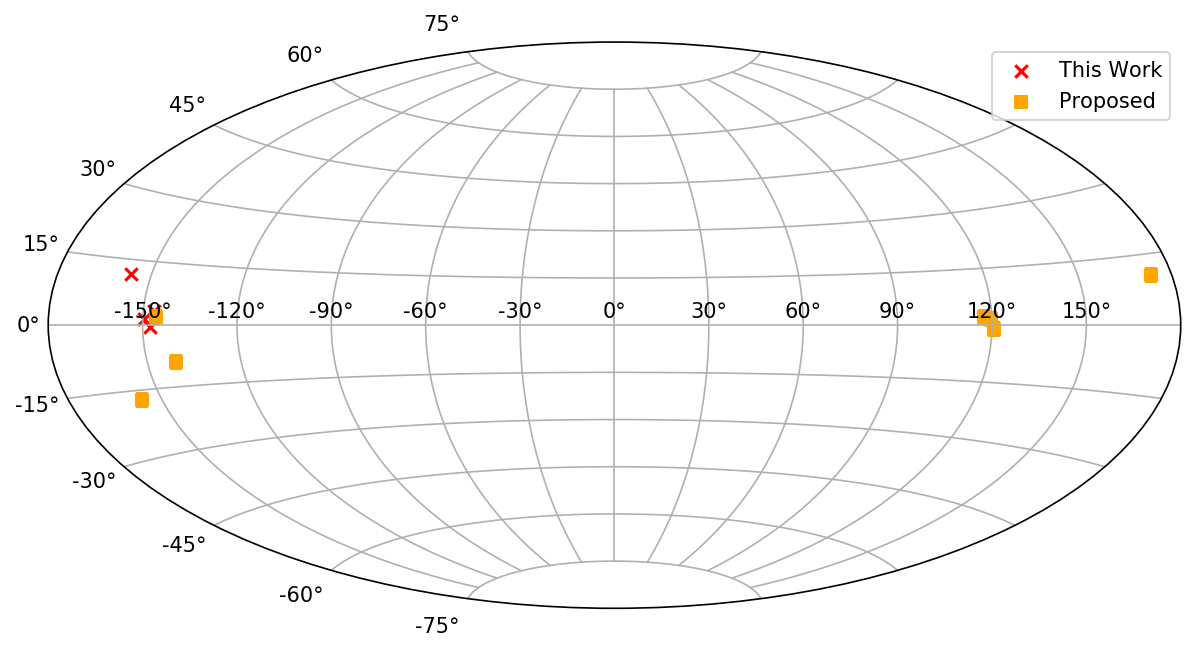

In [47]:
fig = plt.figure(figsize=(10,5), dpi = 150)
plt.subplot(111, projection='aitoff')

plt.scatter(galtw.l.wrap_at('180d').radian, galtw.b.radian, marker = 'x', color = 'red', label = 'This Work')
plt.scatter(galprop.l.wrap_at('180d').radian, galprop.b.radian, marker = 's', color = 'orange', label = 'Proposed')

plt.grid(True)
plt.legend(loc = 'best')